In [1]:
#!pip install torchsummary
#!pip install opencv-python
# !pip install torchvision

In [2]:
# check for GPU
!nvidia-smi

Mon Oct  7 14:22:28 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.78                 Driver Version: 560.78         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:31:00.0 Off |                  N/A |
| N/A   42C    P8              1W /   99W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# load the data
# %conda install pytorch torchvision torchaudio cpuonly -c pytorch
import os
# avoid kernel crash
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from torchvision import transforms, datasets, models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
transform = transforms.Compose([
    transforms.ToTensor(),
])
class CellDataset(Dataset):
    def __init__(self, root, transform, img_size):
        self.path = root
        self.transform = transform
        self.img_size = img_size
        self.files = os.listdir(self.path + "/images")
    def __getitem__(self, index):
        fn = self.files[index]
        img = Image.open(self.path + "/images/" + fn).resize(self.img_size)
        mask = Image.open(self.path + "/masks/" + fn).resize(self.img_size)
        if self.transform:
            img = self.transform(img)
            mask = self.transform(mask)

        return (img, mask)
    def __len__(self):
        return len(self.files)

In [4]:
train_path = r"./kmms_training"
test_path = r"./kmms_test"
img_size = (512, 512)

train_dataset = CellDataset(train_path, transform, img_size)
test_dataset = CellDataset(test_path, transform, img_size)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)


In [5]:
# display one item
import numpy as np
import matplotlib.pyplot as mp

img, mask = train_dataset.__getitem__(0)
img, mask = img.mul(255).byte(), mask.mul(255).byte()
# transpose the channel position for displaying
img, mask = img.numpy().transpose((1, 2, 0)), mask.numpy().transpose((1, 2, 0))
print("img shape = {}, mask shape = {}".format(img.shape, mask.shape))


img shape = (512, 512, 3), mask shape = (512, 512, 1)


Text(0.5, 1.0, 'mixed')

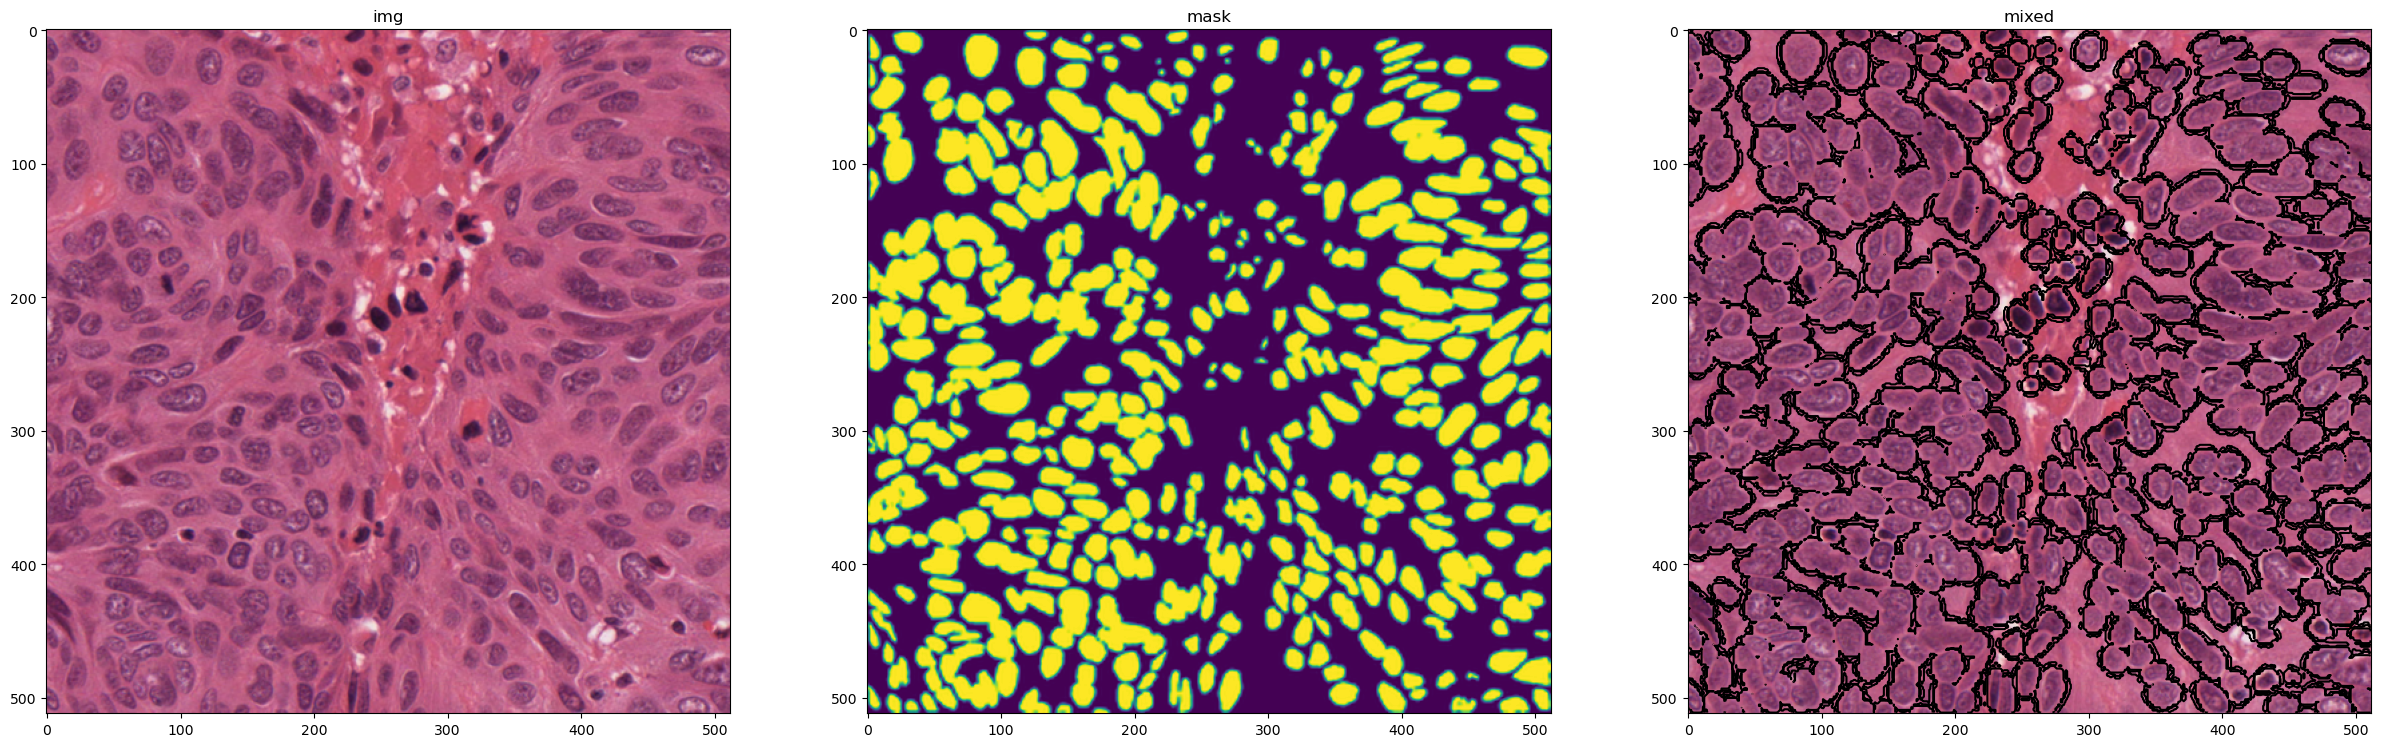

In [7]:
fig, ax = mp.subplots(1, 3, figsize=(30, 10))
ax[0].imshow(img)
ax[0].set_title("img")
ax[1].imshow(mask.squeeze())
ax[1].set_title("mask")
ax[2].imshow(img)
ax[2].contour(mask.squeeze(), colors="k", levels=[0.5])
ax[2].set_title("mixed")